# Route Generator

## Inputs
- File containing the road network
- File containing the link parameters such as travel time, waiting time, toll fare.
- File containing the position, destination, start time for each agent
- File containing the agent parameters

## Outputs
- File containing plans for all agents with scores

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

### Helper Functions

In [2]:
def drawNetwork(G0):
    '''
    Helper function to plot the network for visualization
    
    Inputs:
        G0 - The road network as a networkx graph
    '''
    pos = nx.get_node_attributes(G0, 'pos')
    plt.figure(figsize=(12, 12))    
    nx.draw(G0,pos,labels={node:node for node in G0.nodes()},node_color='g')
    edge_labels = {
        (a,b):np.array2string(nx.get_edge_attributes(G0,'p')[(a,b)],precision=1)
        for a,b in G0.edges()}
    nx.draw_networkx_edge_labels(G0,pos,edge_labels=edge_labels,font_color='r')
    plt.axis('off')
    plt.show()

### Temporary parameters

In [3]:
N = 4 # No. of rows in grid
M = 4 # No. of cols in grid
n_params = 4 # No. of link parameters

### Core Functionality

In [4]:
def getNetworkFromFile(path):
    '''
    Creates a network using the networkx library using the file containing the road network
    
    Inputs:
        path - path to input file containing road network
    
    Outputs:
        G - graph of networkx which contains the road network 
    '''
    
    # TODO: Instead of making network, read from file
    
    global N,M
    
    G = nx.DiGraph()
    
    # Adding N*M nodes to graph
    for i in range(N*M):
        # These positions are only for visualization since (0,0) is 
        # on the bottom left side
        G.add_node(str(i+1),pos=(i%N+1,4-int(i/M)))
    return G
    

In [5]:
def getNetworkWithLinkParameters(G, path):
    '''
    Adds the link parameters (waiting time, travel time, etc to the road network)
    
    Inputs:
        G - input road network as a networkx graph
        path - path to input file containing network parameters
    Outputs:
        G - The road network with parameters added
    '''
    
    # TODO: Read this dict from file
    
    
    global N,M,n_params
    
    # Temporarily using normal distribution (1,0.2) and 4 parameters 
    
    # All nodes will have an edge to the node on their right side
    # except the last column
    for i in range(N):
        for j in range(M-1):
            G.add_edge(str(N*i+j+1), str(N*i+j+2), p=np.random.normal(1,0.2,n_params))
    
    # All nodes will have an edge to the node on their left side
    # except the first column
    for i in range(N):
        for j in range(1,M):
            G.add_edge(str(N*i+j+1), str(N*i+j), p=np.random.normal(1,0.2,n_params))
            
    # All nodes will have an edge to the node on their bottom side
    # except the last row
    for i in range(N-1):
        for j in range(M):
            G.add_edge(str(N*i + j+1), str(N*(i+1)+j+1), p=np.random.normal(1,0.2,n_params))
            
    # All nodes will have an edge to the node on their top side
    # except the first row
    for i in range(1,N):
        for j in range(M):
            G.add_edge(str(N*i + j+1), str(N*(i-1)+j+1), p=np.random.normal(1,0.2,n_params))
    
    return G

### Main Script

In [6]:
G = getNetworkFromFile('path/to/foo')
G = getNetworkWithLinkParameters(G,'path/to/foo')

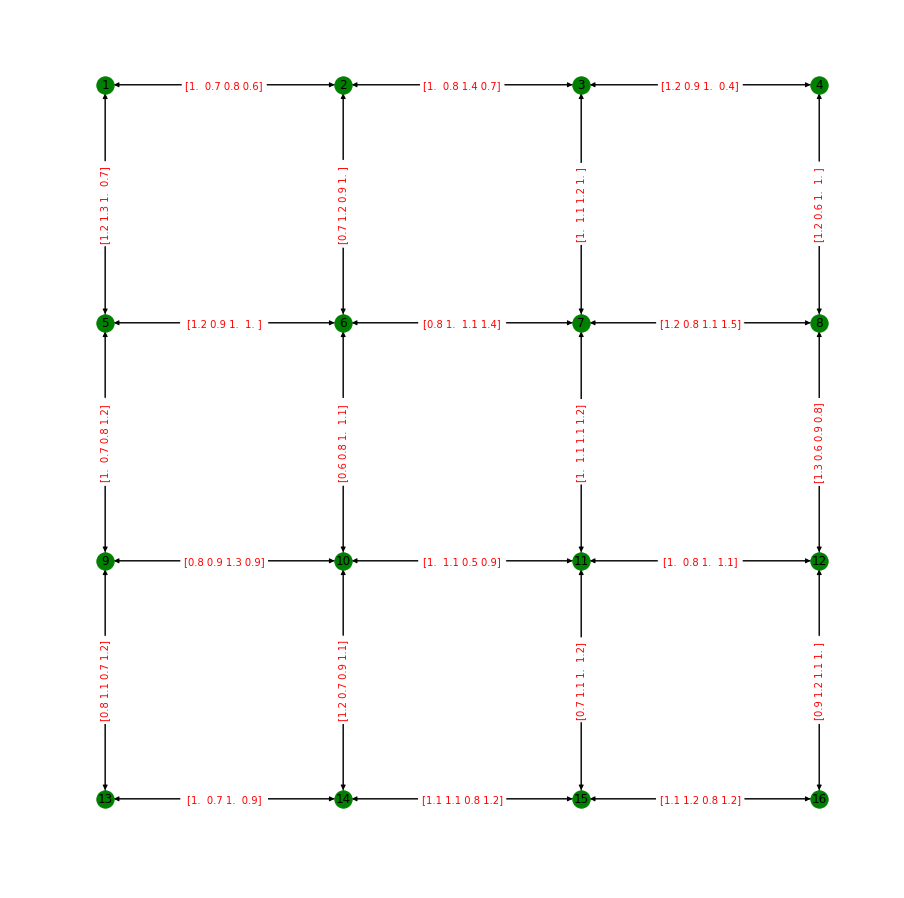

In [7]:
drawNetwork(G)